## 7.3 常用操作
在进行图像卷积操作时，有一些常用的操作需要讲解它们的原理和代码实现。本节我们将具体介绍填充、步长、多通道处理等问题。


### 7.3.1 填充

想必你已经观察到如果卷积核和输入图像尺寸不同，输出图像的大小就不能与输入图像保持一致了。为了解决这个问题，人们想出了很简单但是实用的办法，就是填充（padding）操作。

在卷积运算时，卷积核会在图像上滑动，并对图像的每个子区域进行卷积运算。例如，假设我们有一个 3x3 的输入图像，并使用一个 3x3 的卷积核。在进行卷积运算时，我们会把卷积核的中心对齐到输入图像的左上角，然后对输入图像的这个子区域进行卷积运算。然后我们会把卷积核向右移一个像素，并对输入图像的下一个子区域进行卷积运算。如此重复，直到我们对整个输入图像进行了卷积运算。但是，在进行卷积运算时，边缘像素会被忽略。例如，在上面的例子中，卷积核的左上角会对输入图像的左上角进行卷积运算，但卷积核的右上角和左下角将不会参与卷积运算。这意味着输入图像的边缘像素将不会参与卷积运算，并可能丢失重要信息。

为了解决这个问题，我们可以使用 padding。padding 指的是在输入图像周围填充一圈零值像素。这样，卷积核就可以对输入图像的所有像素进行卷积运算，而不会忽略边缘像素。例如，假设我们使用了一个 3x3 的卷积核和 1 像素的 padding。我们的输入图像是 3x3 的，但实际上我们使用的是一个 5x5 的图像，其中边缘像素都被填充为 0。这样，卷积核就可以对输入图像的所有像素进行卷积运算，而不会忽略边缘像素。

In [8]:
import torch

# 创建输入图像
input_image = torch.tensor([[1, 2, 3],
                            [4, 5, 6],
                            [7, 8, 9]])

# 创建卷积核
kernel = torch.tensor([[0, 1, 0],
                       [1, 1, 1],
                       [0, 1, 0]])

# 使用默认的 padding (padding=0) 进行卷积运算
output_image = torch.conv2d(input_image.unsqueeze(0).unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0))
print(output_image)  # 输出: tensor([[[[25]]]])

# 使用 padding=1 进行卷积运算
output_image_padded = torch.conv2d(input_image.unsqueeze(0).unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0), padding=1)
print(output_image_padded)  # 输出: tensor([[[[ 7, 11, 11],
                            #  [17, 25, 23],
                            #  [19, 29, 23]]]])


tensor([[[[25]]]])
tensor([[[[ 7, 11, 11],
          [17, 25, 23],
          [19, 29, 23]]]])


在这个示例中，我们使用了一个 3x3 的输入图像和一个 3x3 的卷积核。默认的 padding 是 0，因此我们的输出图像是 1x1 的。但是，如果我们使用 padding=1，则输出图像将是 3x3 的，因为我们在输入图像周围填充了一圈 0 像素。你可以看到，使用 padding 后输出图像更大，并且边缘像素也参与了卷积运算。这就是使用 padding 的好处。

#### 使用填充时的注意事项：

* 在使用 padding 时，你需要确定 padding 的大小。一般来说，padding 的大小应该是卷积核的大小的一半。例如，如果卷积核的大小是 3x3，则 padding 的大小应该是 1。这样，卷积核就可以对输入图像的所有像素进行卷积运算，而不会忽略边缘像素。

* 在使用 padding 时，输入图像的大小会变大。这可能会导致模型的计算量增加，并可能需要更多的存储空间。因此，你需要考虑是否真的需要使用 padding，或者是否可以使用更小的 padding 大小。

* 在使用 padding 时，输出图像的大小也会变大。这可能会导致模型的计算量增加，并可能需要更多的存储空间。因此，你需要考虑是否真的需要使用 padding，或者是否可以使用更小的 padding 大小。

* 在使用 padding 时，你可能需要使用更多的卷积层来捕捉更多的特征。因为使用 padding 后输入图像的大小会变大，所以你可能需要使用更多的卷积层来提取图像的特征。

### 7.3.2 步长
在卷积神经网络 (CNN) 中，步长（stride）是指卷积核在输入图像上滑动的步长。例如，假设我们有一个 3x3 的输入图像，并使用一个 3x3 的卷积核。在进行卷积运算时，我们会把卷积核的中心对齐到输入图像的左上角，然后对输入图像的这个子区域进行卷积运算。然后我们会把卷积核向右移一个像素，并对输入图像的下一个子区域进行卷积运算。如此重复，直到我们对整个输入图像进行了卷积运算。

我们可以通过调整步长来改变卷积核在输入图像上滑动的距离。例如，如果步长是 2，则卷积核会每次向右移动 2 个像素。这会导致卷积核对输入图像进行卷积运算的次数减少，但同时也会导致输出图像的大小减小。通常来说，步长的值为 1 或 2。当步长为 1 时，卷积核会在输入图像上滑动一个像素。当步长为 2 时，卷积核会在输入图像上滑动两个像素。使用较大的步长可以减少卷积运算的次数，并减少输出图像的大小。这可以降低计算量，但同时也可能导致信息丢失。因此，在选择步长时，需要权衡计算量和信息损失的问题。

此外，步长还可以用于控制卷积核的步长在输入图像的哪一维方向滑动。例如，假设我们有一个 4x4 的输入图像和一个 3x3 的卷积核。如果我们设置步长为 (1, 2)，则卷积核会在输入图像的行方向滑动 1 个像素，在列方向滑动 2 个像素。这样，卷积核会对输入图像进行 4 次卷积运算，并产生一个 2x2 的输出图像。



In [9]:
import torch

# 创建输入图像
input_image = torch.tensor([[1, 2, 3, 4],
                            [5, 6, 7, 8],
                            [9, 10, 11, 12],
                            [13, 14, 15, 16]])

# 创建卷积核
kernel = torch.tensor([[0, 1, 0],
                       [1, 1, 1],
                       [0, 1, 0]])

# 使用步长为 1 进行卷积运算
output_image = torch.conv2d(input_image.unsqueeze(0).unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0), stride=1, padding=1)
print("Output image with stride=1:")
print(output_image) 

# 使用步长为 2 进行卷积运算
output_image_strided = torch.conv2d(input_image.unsqueeze(0).unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0), stride=2,padding=1)
print("Output image with stride=2:")
print(output_image_strided)  

# 使用步长为 3 进行卷积运算
output_image_strided = torch.conv2d(input_image.unsqueeze(0).unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0), stride=3)
print("Output image with stride=3:")
print(output_image_strided)  

Output image with stride=1:
tensor([[[[ 8, 12, 16, 15],
          [21, 30, 35, 31],
          [37, 50, 55, 47],
          [36, 52, 56, 43]]]])
Output image with stride=2:
tensor([[[[ 8, 16],
          [37, 55]]]])
Output image with stride=3:
tensor([[[[30]]]])


### 7.3.3 多通道处理

面对复杂一点拥有多个通道的彩色图像，在进行卷积操作时面临如何处理这多个通道的问题。具体怎么办呢？这主要取决于使用的卷积方式。通常来说，我们有两种卷积方式可以用于处理多个通道的图像：

#### 分组卷积

在分组卷积中，我们将输入图像的通道划分成若干组，每组中的通道使用相同的卷积核进行卷积。例如，假设我们有一个三维输入图像 $\mathbf{X}\in\mathbb{R}^{H\times W\times C}$，其中 $C$ 表示通道数。我们使用的卷积核是一个四维张量 $\mathbf{W}\in\mathbb{R}^{k_h\times k_w\times C\times K}$，其中 $K$ 表示输出通道数。在使用全连接卷积时，卷积层包含的参数数量为 $k_hk_wCK$，而在使用分组卷积时，可以将输入图像的通道划分成 $G$ 组，每组包含 $C/G$ 个通道，这样卷积层包含的参数数量就变为 $k_hk_w(C/G)K$。当 $G>1$ 时，卷积层包含的参数数量就会减少。

#### 全连接卷积

在全连接卷积中，我们对输入图像的每一个通道分别使用不同的卷积核进行卷积。例如，假设我们有一个三维输入图像 $\mathbf{X}\in\mathbb{R}^{H\times W\times C}$，其中 $C$ 表示通道数。我们使用的卷积核是一个四维张量 $\mathbf{W}\in\mathbb{R}^{k_h\times k_w\times C\times K}$，其中 $K$ 表示输出通道数。在全连接卷积中，我们对输入图像的每一个通道分别使用不同的卷积核进行卷积，得到 $C$ 个二维输出图像 $\mathbf{Y}_1, \mathbf{Y}_2, \dots, \mathbf{Y}_C$。然后，我们将这 $C$ 个二维输出图像在通道维度上拼接在一起，得到最终的三维输出图像 $\mathbf{Y}\in\mathbb{R}^{H\times W\times K}$。

不仅输入图像可以是多通道的，输出图像也可以有。在卷积神经网络 (CNN) 中，输出通道是指卷积层输出的图像的数量。例如，如果卷积层的输出通道数为 16，则会产生 16 个输出图像，每个图像都是独立的。

使用多个输出通道可以增强 CNN 的能力，因为它可以捕捉不同的特征。例如，在图像分类任务中，卷积层的某些输出通道可能会捕捉边缘特征，而其他通道可能会捕捉颜色特征。举个例子，假设我们正在对一张包含猫的图像进行分类。在这种情况下，卷积层的某些输出通道可能会捕捉到图像中猫的轮廓线，而其他通道可能会捕捉到猫的毛发颜色。这样，CNN 就可以利用这些信息来判断图像中是否存在猫。

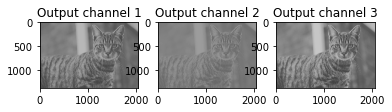

In [6]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import torch
import matplotlib.pyplot as plt
import numpy as np

# 加载图像
from skimage import io
image = io.imread("../images/732.jpg")

# 将图像转换为 PyTorch 张量
image = torch.tensor(image).float()

# 将图像的通道数转换为单通道
image = image.mean(dim=2)

# 添加批量维度
image = image.unsqueeze(0).unsqueeze(0)

# 创建卷积层，输出通道数为 3
conv = torch.nn.Conv2d(1, 3, kernel_size=3)

# 对输入图像进行卷积
output = conv(image)

# 将输出转换为 NumPy 数组
output_image = output.squeeze(0).detach().numpy()

# 将输出图像的 3 个通道可视化
plt.subplot(1, 3, 1)
plt.imshow(output_image[0], cmap='gray')
plt.title("Output channel 1")
plt.subplot(1, 3, 2)
plt.imshow(output_image[1], cmap='gray')
plt.title("Output channel 2")
plt.subplot(1, 3, 3)
plt.imshow(output_image[2], cmap='gray')
plt.title("Output channel 3")
plt.show()


[Next 7-4 池化层](./7-4%20池化层.ipynb)